#Titanic Data Analysis

In [459]:
#importing modules

import pandas as pd
from pandas import Series, DataFrame

In [460]:
#importing 'train.csv' and assigning it to a DataFrame, 'titanic_dataframe'.
titanic_dataframe = pd.read_csv('train.csv')
type(titanic_dataframe)

pandas.core.frame.DataFrame

In [461]:
#displaying the first few rows using head()
titanic_dataframe.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [462]:
#displaying the dataframe details using info().
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


**Note: Cabin has only 204 non-null objects

Some basic questions:

1) Who were the passengers? (Age,Gender,Class,...etc)

2) What deck were the passengers on and how does that relate to the class?

3) Where did the passengers come from?

4) Did the passengers have any siblings/children/parents onboard?

5) What factors played key role in passenger survival?

##1) Who were the passengers? (Age,Gender,Class,...etc)

In [463]:
#importing numpy,matplotlib and seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

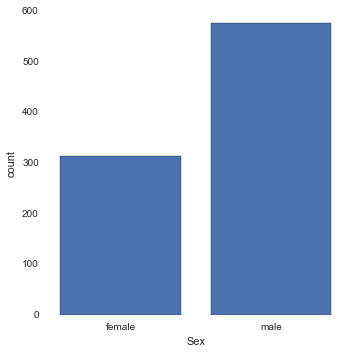

In [464]:
#Plotting a simple factorplot for the field 'Sex' for determining the gender distribution.
sns.factorplot('Sex', data = titanic_dataframe);

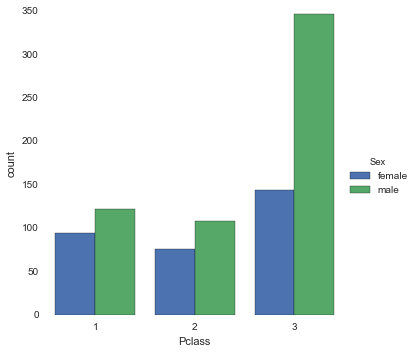

In [465]:
#digging further, gender distribution on the basis of Passenger Class
sns.factorplot('Pclass', hue = 'Sex', data = titanic_dataframe);

###Class-wise distribution of males and females

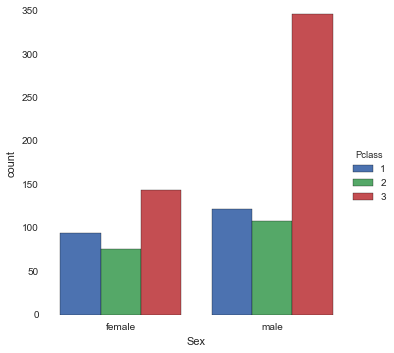

In [466]:
#Another way of looking at things
sns.factorplot('Sex', hue = 'Pclass', data = titanic_dataframe);

In [467]:
#defining a method to classify the passengers into male/female/child on the basis of age 
def child_flag(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [468]:
#applying the method using apply() on column(axis = 1) to create a new column, 'Person'
titanic_dataframe['Person'] = titanic_dataframe[['Age','Sex']].apply(child_flag,axis=1)

In [469]:
titanic_dataframe.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


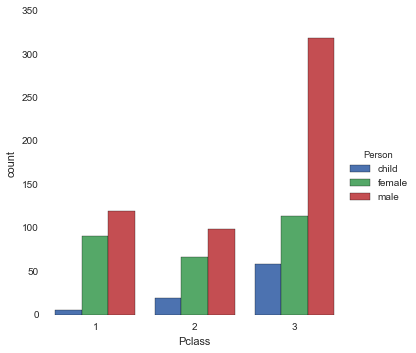

In [470]:
sns.factorplot('Pclass',data = titanic_dataframe, hue = 'Person');

###Class-wise person distribution

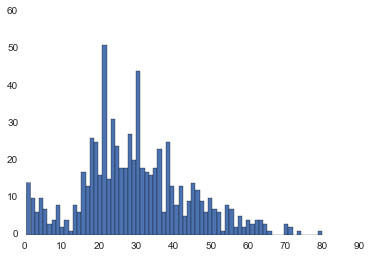

In [471]:
#Plotting the age distribution onboard
titanic_dataframe['Age'].hist(bins = 70);

In [472]:
#mean age
titanic_dataframe['Age'].mean()

29.69911764705882

In [473]:
#Count of children, males and females
titanic_dataframe['Person'].value_counts()

male      537
female    271
child      83
dtype: int64

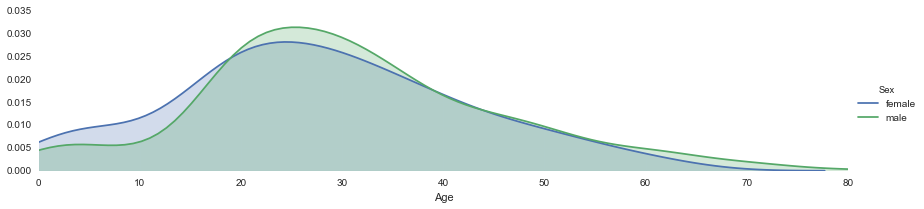

In [474]:
figure = sns.FacetGrid(titanic_dataframe,hue = 'Sex',aspect = 4)#plotting on basis of sex
figure.map(sns.kdeplot,'Age',shade = True)#for KDE plots for age

oldest = titanic_dataframe['Age'].max()#oldest passenger on board will be the maximum value for the x-axis range
figure.set(xlim = (0,oldest))#Setting the range for x-axis
figure.add_legend() #Adds the key

###KDE plot for male and female

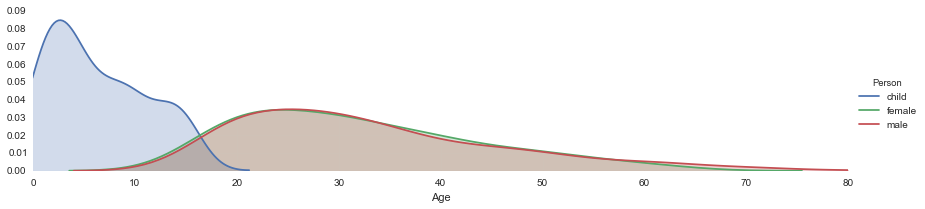

In [475]:
#Plotting on basis of the Person column
figure = sns.FacetGrid(titanic_dataframe,hue = 'Person',aspect = 4)
figure.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_dataframe['Age'].max()
figure.set(xlim = (0,oldest))
figure.add_legend()

###KDE plot for male,female and child

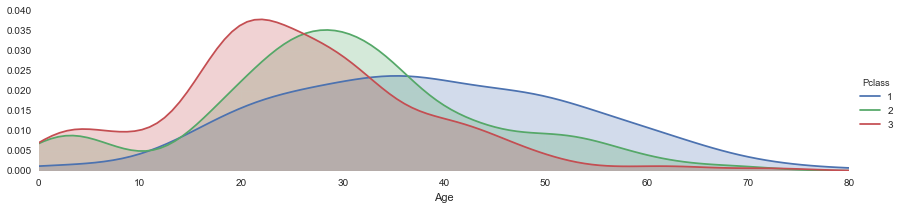

In [476]:
figure = sns.FacetGrid(titanic_dataframe,hue = 'Pclass',aspect = 4)
figure.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_dataframe['Age'].max()
figure.set(xlim = (0,oldest))
figure.add_legend()

###KDE plot for class






##2) What deck were the passengers on and how does that relate to the class?

In [477]:
titanic_dataframe['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [478]:
#creating a new object to get rid of the 'na' values in Cabin
deck = titanic_dataframe['Cabin'].dropna()

In [479]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

##Looking for a relationship between cabins and embarktion columns:

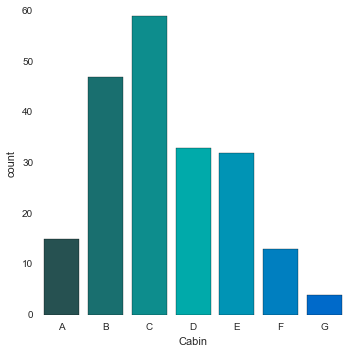

In [480]:
#Colleting the cabing alphabet in a list[] to plot it separately using a separate dataframe called cabin_df
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df = cabin_df[cabin_df.Cabin !='T']#Removing cabin 'T'
sns.factorplot('Cabin',data = cabin_df,palette = 'winter_d');

##Cabin wise distribution(decks)

##3) Where did the passengers come from?

In [481]:
#Remapping Embarked column to input complete dock names
titanic_dataframe['Embarked'] = titanic_dataframe['Embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})


In [482]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male


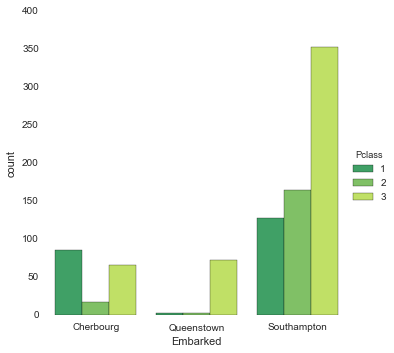

In [483]:
sns.factorplot('Embarked', data = titanic_dataframe,hue = 'Pclass',x_order = ['Cherbourg','Queenstown','Southampton'],palette = 'summer');

In [484]:
titanic_dataframe.Embarked.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
dtype: int64

###Dock wise class distribution

##4) Did the passengers have any siblings/children/parents onboard?

In [485]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male


In [486]:
titanic_dataframe['Alone'] = titanic_dataframe.SibSp + titanic_dataframe.Parch

In [487]:
titanic_dataframe.Alone.loc[titanic_dataframe.Alone > 0] = 'With Family'
titanic_dataframe.Alone.loc[titanic_dataframe.Alone == 0] = 'Alone'

In [488]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male,Alone


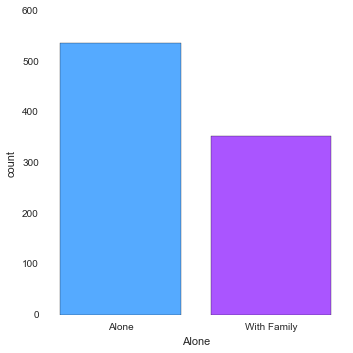

In [489]:
sns.factorplot('Alone',data = titanic_dataframe, palette = 'cool');

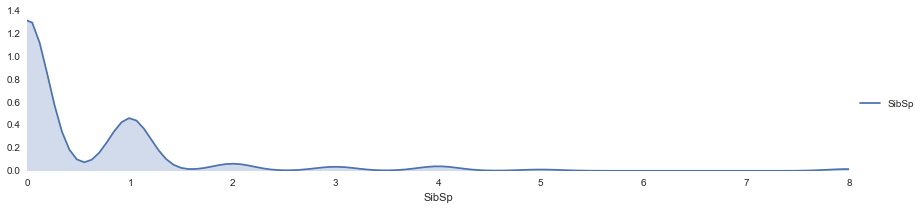

In [490]:
#Sibling Distribution
figure = sns.FacetGrid(titanic_dataframe,aspect = 4)
figure.map(sns.kdeplot,'SibSp',shade = True)

max_val = titanic_dataframe['SibSp'].max()
figure.set(xlim = (0,max_val))
figure.add_legend()

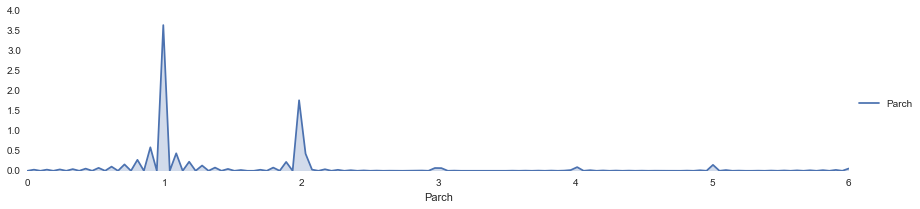

In [491]:
#Parent/ChildDistribution
figure = sns.FacetGrid(titanic_dataframe,aspect = 4)
figure.map(sns.kdeplot,'Parch',shade = True)

max_val = titanic_dataframe['Parch'].max()
figure.set(xlim = (0,max_val))
figure.add_legend()

##5) What factors played key role in passenger survival?

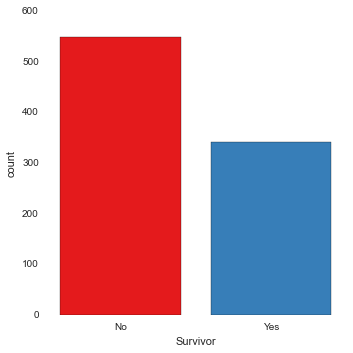

In [492]:
#Defining new column Survivor for subsetting survival data
titanic_dataframe['Survivor'] = titanic_dataframe.Survived.map({0:'No',1:'Yes'})
#Plotting Survivors
sns.factorplot('Survivor',data = titanic_dataframe,palette = 'Set1');

###Factors affecting survival:

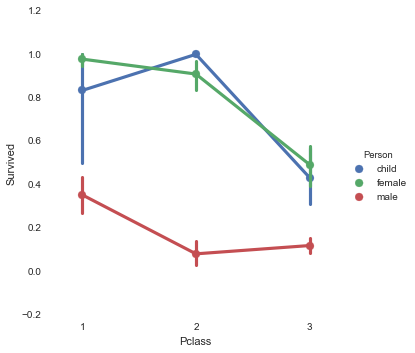

In [493]:
sns.factorplot('Pclass','Survived',data = titanic_dataframe,hue = 'Person');

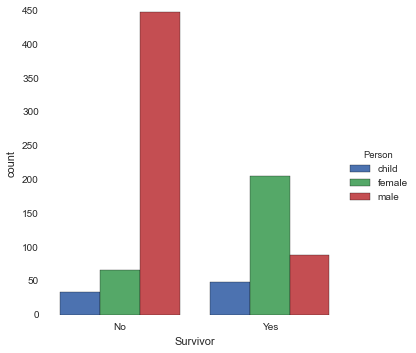

In [494]:
sns.factorplot('Survivor',data = titanic_dataframe,hue = 'Person');

###Person wise survival

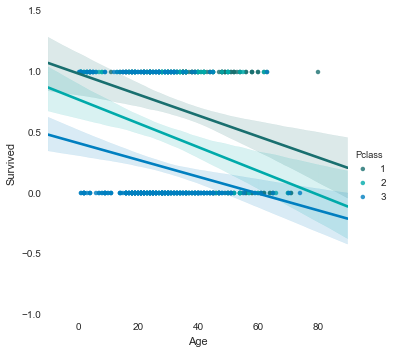

In [495]:
sns.lmplot('Age','Survived',hue = 'Pclass',data = titanic_dataframe,palette= 'winter_d');

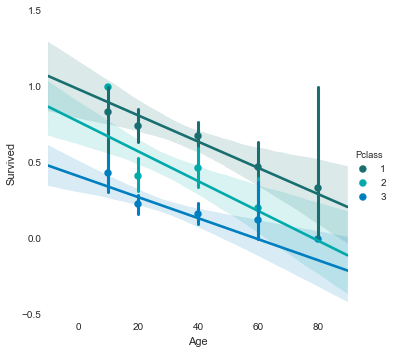

In [496]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue = 'Pclass',data = titanic_dataframe,palette= 'winter_d',x_bins = generations);

####Older the passenger,lesser the chances of survival

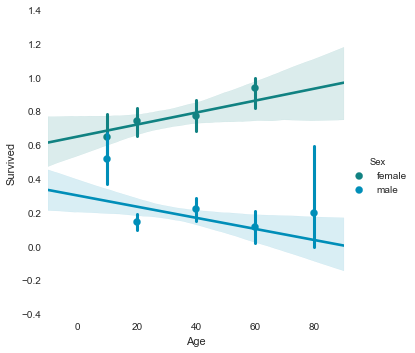

In [497]:
sns.lmplot('Age','Survived',hue = 'Sex',data = titanic_dataframe,palette= 'winter_d',x_bins = generations);

###Trend of gender-wise casualities

###Effect of deck type on survival rate:

In [510]:
#Separating the cabin values to divide it on the basis of deck type
#Creating a new column called Cabins
zero_vals = titanic_dataframe.Cabin.fillna(0)

In [499]:
empty_list = []
empty_list2 = []
for p in zero_vals:
    empty_list.append(str(p))
for q in empty_list:
    empty_list2.append(q[0])

In [500]:
Ser1 = Series(empty_list2)

In [501]:
titanic_dataframe['Cabins'] = Ser1

In [502]:
titanic_dataframe['Cabins'] = titanic_dataframe.Cabins.replace('0',titanic_dataframe.Cabin[0])
titanic_dataframe.Cabins = titanic_dataframe.Cabins[titanic_dataframe.Cabins !='T']#Removing cabin 'T'

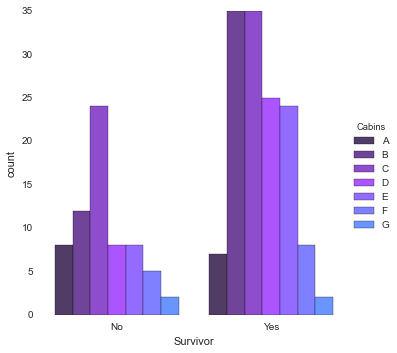

In [503]:
sns.factorplot('Survivor',data = titanic_dataframe,hue = 'Cabins',dropna = True,palette = 'cool_d');

###Effect of family members on survival rate:

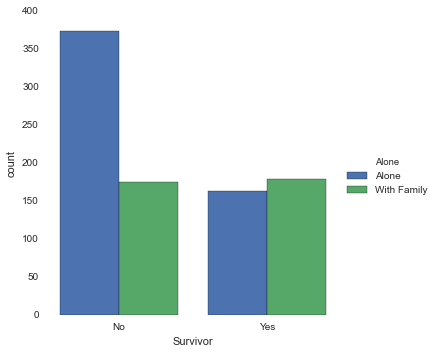

In [504]:
sns.factorplot('Survivor',data = titanic_dataframe, hue = 'Alone');

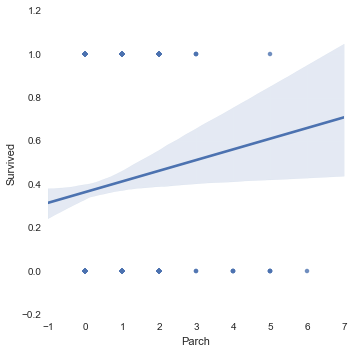

In [505]:

sns.lmplot(x ='Parch' ,y = 'Survived',data = titanic_dataframe);

###Trend of survival varying with number of children or parents

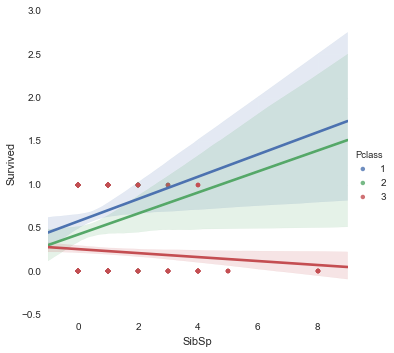

In [506]:
sns.lmplot(x = 'SibSp', y = 'Survived',data = titanic_dataframe,hue = 'Pclass' )

###Trend of survival varying with number of children or parents

In [507]:
#For combined effect of Family members on Survival
titanic_dataframe['Family'] = titanic_dataframe.SibSp + titanic_dataframe.Parch

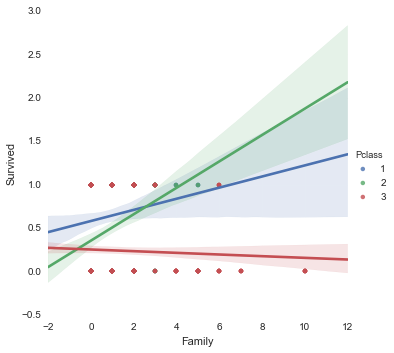

In [508]:
sns.lmplot('Family',y = 'Survived',data=titanic_dataframe,hue = 'Pclass');

###Overall Effect of family on survival is Positive ,depending on the passenger class.